In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [78]:
data = pd.read_csv("hospital data analysis.csv")
data

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Medication and Counseling,1000,70,No,Stable,4
980,997,45,Female,Appendicitis,Appendectomy,8000,72,No,Recovered,3
981,998,40,Male,Fractured Leg,Cast and Physical Therapy,3000,72,No,Recovered,4
982,999,78,Female,Heart Attack,Cardiac Catheterization,18000,74,Yes,Stable,2


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


In [80]:
# Menampilkan variabel
variabel = list(data.columns)
print(variabel)

['Patient_ID', 'Age', 'Gender', 'Condition', 'Procedure', 'Cost', 'Length_of_Stay', 'Readmission', 'Outcome', 'Satisfaction']


In [81]:
# Menampilkan nilai unik untuk setiap kolom
for i in variabel:
    print(f"Value counts for column '{i}':")
    print(data[i].unique())
    print()

Value counts for column 'Patient_ID':
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   61   62   63   64   65   66   67   68   69   70   71
   72   73   74   75   76   77   78   79   80   81   82   83   84   85
   86   87   88   89   90   91   92   93   94   95   96   97   98   99
  100  101  102  103  104  105  106  107  108  109  110  111  112  113
  114  115  116  117  118  119  120  122  123  124  125  126  127  128
  129  130  131  132  133  134  135  136  137  138  139  140  141  142
  143  144  145  146  147  148  149  150  151  152  153  154  155  156
  157  158  159  160  161  162  163  164  165  166  167  168  169  170
  171  172  173  174  175  176  177  178  179  180  181  183  184  185
  186  187  188  189  190  191  192  19

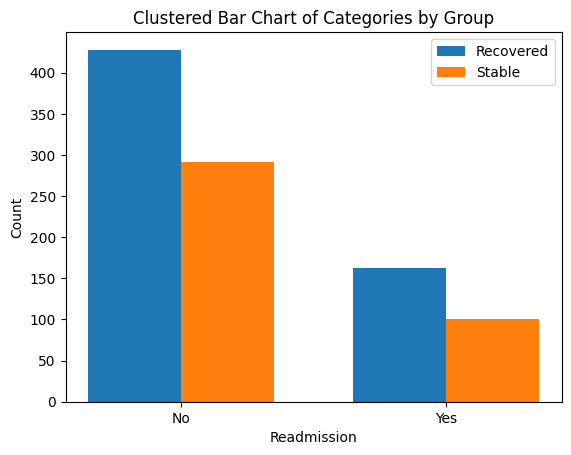

In [82]:
# Menghitung frekuensi
counts = data.groupby(['Outcome', 'Readmission']).size().unstack(fill_value=0)

# Menyiapkan kategori dan grup
categories = counts.columns
groups = counts.index

bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots()

# Membuat clustered bar chart
for i, group in enumerate(groups):
    ax.bar(index + i * bar_width, counts.loc[group], bar_width, label=group)

ax.set_xlabel('Readmission')
ax.set_ylabel('Count')
ax.set_title('Clustered Bar Chart of Categories by Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

In [83]:
# Menampilkan statistik deskriptif
data.describe()

,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
count,984.000000,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618,3.598577
std,288.979531,14.941135,7761.990976,19.595805,0.883002
min,1.000000,25.000000,100.000000,1.000000,2.000000
25%,250.750000,45.000000,1000.000000,21.000000,3.000000
50%,500.500000,55.000000,6000.000000,38.000000,4.000000
75%,750.250000,65.000000,15000.000000,54.250000,4.000000
max,1000.000000,78.000000,25000.000000,76.000000,5.000000


In [84]:
# Menentukan variabel numerik
num_var = ['Age', 'Cost', 'Length_of_Stay']
print(num_var)

['Age', 'Cost', 'Length_of_Stay']


<Axes: >

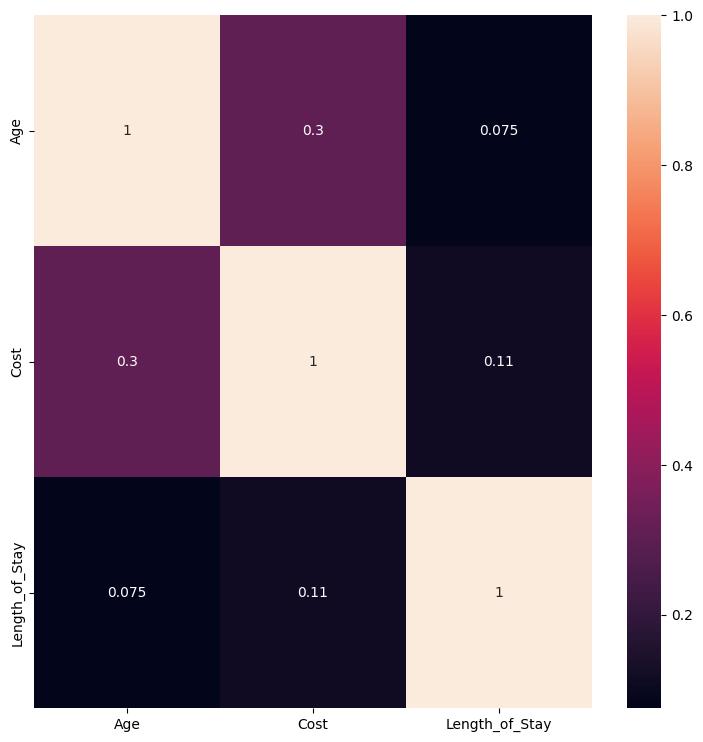

In [85]:
# Plot heatmap untuk korelasi
plt.figure(figsize=(9,9))
sns.heatmap(data[num_var].corr(), annot=True)

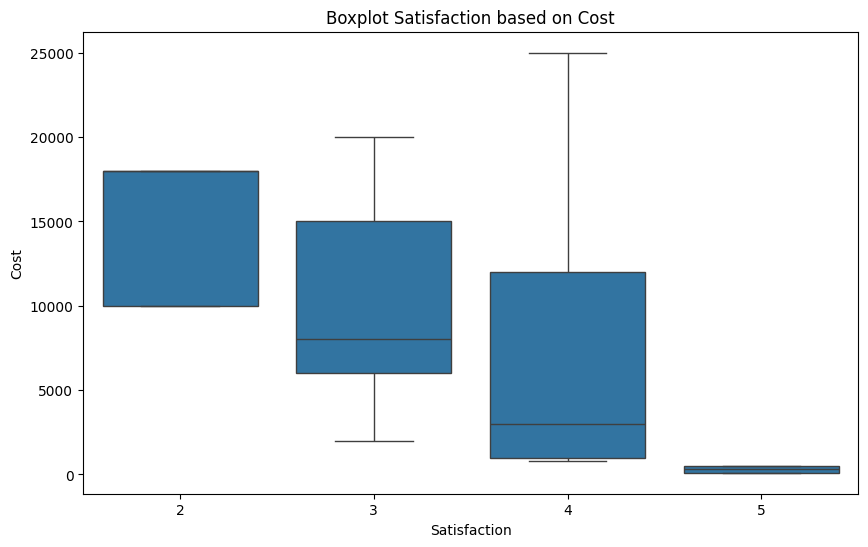

In [86]:
# Boxplot Satisfaction based on Cost
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Cost', data=data)
plt.title('Boxplot Satisfaction based on Cost')
plt.xlabel('Satisfaction')
plt.ylabel('Cost')
plt.show()


In [87]:
# Menampilkan value counts untuk Satisfaction
print(data[data['Satisfaction']==2]['Cost'].value_counts())
print(data[data['Satisfaction']==5]['Cost'].value_counts())
print(data[(data['Satisfaction']==5)]['Condition'].value_counts())
print(data[(data['Satisfaction']==5)]['Procedure'].value_counts())


Cost
18000    67
10000    66
Name: count, dtype: int64
Cost
500    66
100    66
Name: count, dtype: int64
Condition
Fractured Arm        66
Allergic Reaction    66
Name: count, dtype: int64
Procedure
X-Ray and Splint         66
Epinephrine Injection    66
Name: count, dtype: int64


In [88]:
# Menampilkan jumlah missing values dan data duplikat
print(data.isna().sum())
print(data.duplicated().sum())

Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64
0


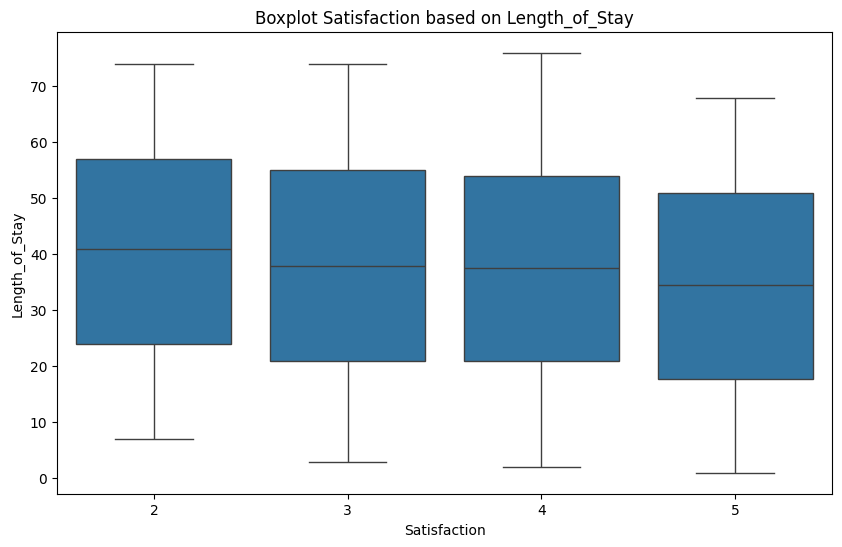

In [89]:
# Boxplot Satisfaction based on Length_of_Stay
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Length_of_Stay', data=data)
plt.title('Boxplot Satisfaction based on Length_of_Stay')
plt.xlabel('Satisfaction')
plt.ylabel('Length_of_Stay')
plt.show()

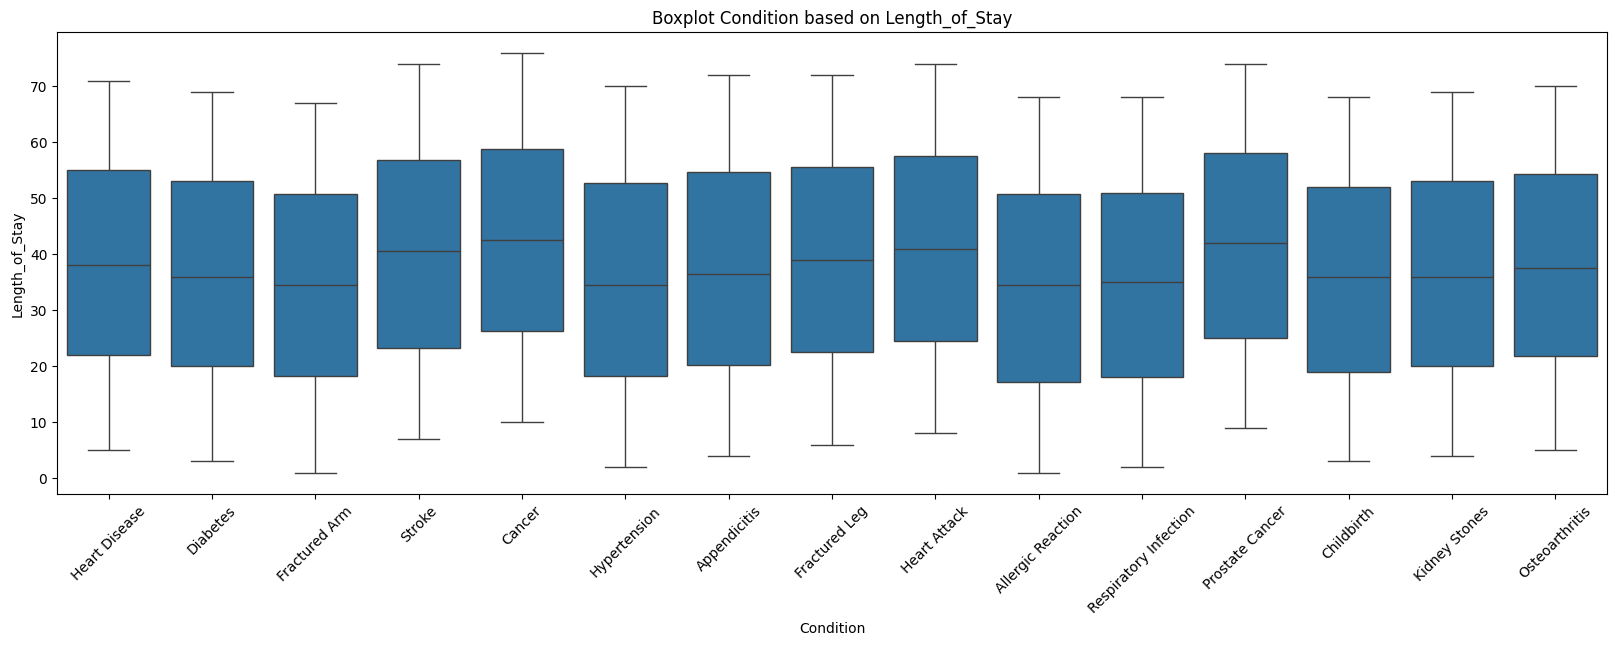

In [90]:
# Boxplot Condition based on Length_of_Stay
plt.figure(figsize=(20, 6))
sns.boxplot(x='Condition', y='Length_of_Stay', data=data)
plt.title('Boxplot Condition based on Length_of_Stay')
plt.xlabel('Condition')
plt.ylabel('Length_of_Stay')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Mendapatkan kolom objek
object_columns = list(data.select_dtypes(include=['object']).columns)
print(object_columns)

['Gender', 'Condition', 'Procedure', 'Readmission', 'Outcome']


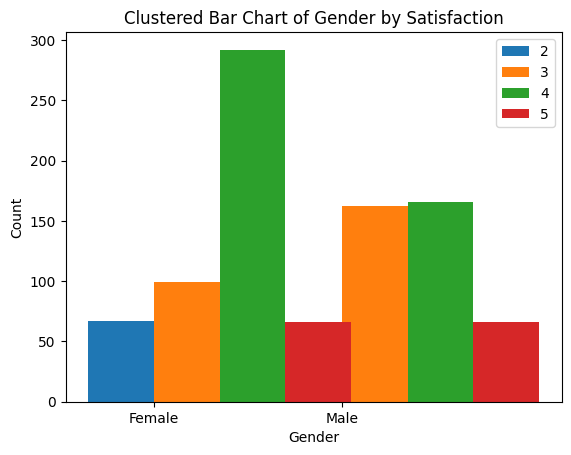

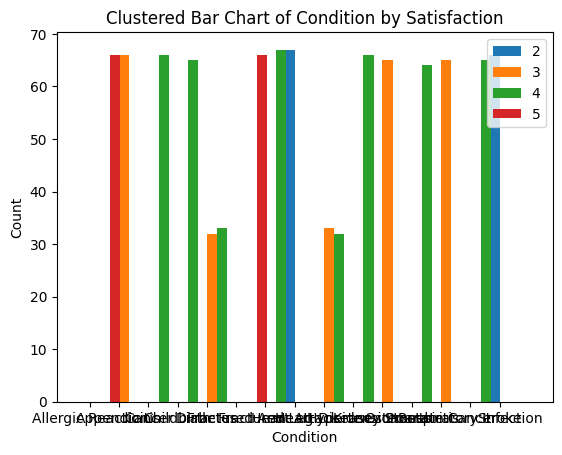

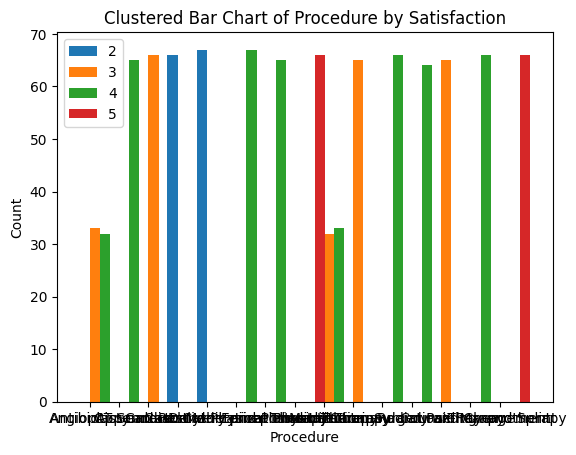

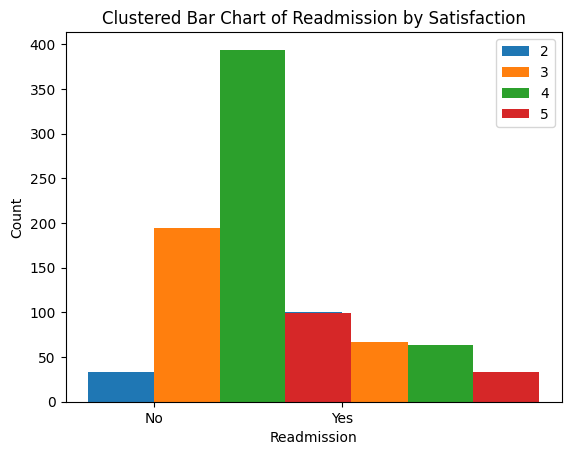

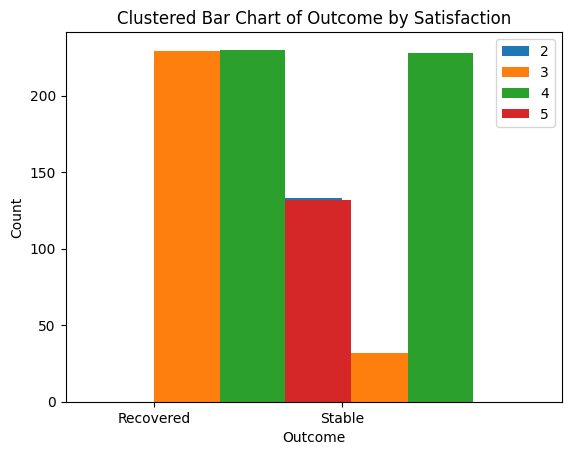

In [92]:
# Membuat clustered bar chart untuk kolom objek berdasarkan Satisfaction
for column in object_columns:
    if column != 'Satisfaction':
        counts = data.groupby(['Satisfaction', column]).size().unstack(fill_value=0)
        categories = counts.columns
        groups = counts.index
        bar_width = 0.35
        index = np.arange(len(categories))

        fig, ax = plt.subplots()
        for i, group in enumerate(groups):
            ax.bar(index + i * bar_width, counts.loc[group], bar_width, label=group)

        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Clustered Bar Chart of {column} by Satisfaction')
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(categories)
        ax.legend()
        plt.show()

In [93]:
# Binary encoding untuk kolom tertentu
binary_enc = ['Gender', 'Readmission', 'Outcome']
print(binary_enc)

['Gender', 'Readmission', 'Outcome']


In [94]:
# Dummy encoding untuk kolom tertentu
dummy_enc = ['Procedure', 'Condition']
print(dummy_enc)

['Procedure', 'Condition']


In [95]:
data

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Medication and Counseling,1000,70,No,Stable,4
980,997,45,Female,Appendicitis,Appendectomy,8000,72,No,Recovered,3
981,998,40,Male,Fractured Leg,Cast and Physical Therapy,3000,72,No,Recovered,4
982,999,78,Female,Heart Attack,Cardiac Catheterization,18000,74,Yes,Stable,2


In [96]:
# Menggunakan pd.get_dummies untuk dummy encoding
data = pd.get_dummies(data, columns=dummy_enc)

In [97]:
# Mengonversi kolom boolean ke integer
boolean_columns = [cname for cname in data.columns if data[cname].dtype in [bool]]
data[boolean_columns] = data[boolean_columns].astype(int)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Patient_ID                                      984 non-null    int64 
 1   Age                                             984 non-null    int64 
 2   Gender                                          984 non-null    object
 3   Cost                                            984 non-null    int64 
 4   Length_of_Stay                                  984 non-null    int64 
 5   Readmission                                     984 non-null    object
 6   Outcome                                         984 non-null    object
 7   Satisfaction                                    984 non-null    int64 
 8   Procedure_Angioplasty                           984 non-null    int32 
 9   Procedure_Antibiotics and Rest                  984 no

In [99]:
data

,Patient_ID,Age,Gender,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Procedure_Angioplasty,Procedure_Antibiotics and Rest,...,Condition_Fractured Arm,Condition_Fractured Leg,Condition_Heart Attack,Condition_Heart Disease,Condition_Hypertension,Condition_Kidney Stones,Condition_Osteoarthritis,Condition_Prostate Cancer,Condition_Respiratory Infection,Condition_Stroke
0,1,45,Female,15000,5,No,Recovered,4,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,60,Male,2000,3,Yes,Stable,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,32,Female,500,1,No,Recovered,5,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,75,Male,10000,7,Yes,Stable,2,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,50,Female,25000,10,No,Recovered,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,1000,70,No,Stable,4,0,0,...,0,0,0,0,1,0,0,0,0,0
980,997,45,Female,8000,72,No,Recovered,3,0,0,...,0,0,0,0,0,0,0,0,0,0
981,998,40,Male,3000,72,No,Recovered,4,0,0,...,0,1,0,0,0,0,0,0,0,0
982,999,78,Female,18000,74,Yes,Stable,2,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
# Menggunakan LabelEncoder untuk binary encoding
le = LabelEncoder()
for i in binary_enc:
    data[i] = le.fit_transform(data[i])
print(data)

     Patient_ID  Age  Gender   Cost  Length_of_Stay  Readmission  Outcome  \
0             1   45       0  15000               5            0        0   
1             2   60       1   2000               3            1        1   
2             3   32       0    500               1            0        0   
3             4   75       1  10000               7            1        1   
4             5   50       0  25000              10            0        0   
..          ...  ...     ...    ...             ...          ...      ...   
979         996   68       1   1000              70            0        1   
980         997   45       0   8000              72            0        0   
981         998   40       1   3000              72            0        0   
982         999   78       0  18000              74            1        1   
983        1000   25       1    100              68            0        0   

     Satisfaction  Procedure_Angioplasty  Procedure_Antibiotics and Rest  .

In [101]:
data

,Patient_ID,Age,Gender,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Procedure_Angioplasty,Procedure_Antibiotics and Rest,...,Condition_Fractured Arm,Condition_Fractured Leg,Condition_Heart Attack,Condition_Heart Disease,Condition_Hypertension,Condition_Kidney Stones,Condition_Osteoarthritis,Condition_Prostate Cancer,Condition_Respiratory Infection,Condition_Stroke
0,1,45,0,15000,5,0,0,4,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,60,1,2000,3,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,32,0,500,1,0,0,5,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,75,1,10000,7,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,50,0,25000,10,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,996,68,1,1000,70,0,1,4,0,0,...,0,0,0,0,1,0,0,0,0,0
980,997,45,0,8000,72,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
981,998,40,1,3000,72,0,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0
982,999,78,0,18000,74,1,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0


In [102]:
# Menghapus kolom Patient_ID
data.drop('Patient_ID', axis=1, inplace=True)
print(data)

     Age  Gender   Cost  Length_of_Stay  Readmission  Outcome  Satisfaction  \
0     45       0  15000               5            0        0             4   
1     60       1   2000               3            1        1             3   
2     32       0    500               1            0        0             5   
3     75       1  10000               7            1        1             2   
4     50       0  25000              10            0        0             4   
..   ...     ...    ...             ...          ...      ...           ...   
979   68       1   1000              70            0        1             4   
980   45       0   8000              72            0        0             3   
981   40       1   3000              72            0        0             4   
982   78       0  18000              74            1        1             2   
983   25       1    100              68            0        0             5   

     Procedure_Angioplasty  Procedure_Antibiotics a

In [103]:
data

,Age,Gender,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Procedure_Angioplasty,Procedure_Antibiotics and Rest,Procedure_Appendectomy,...,Condition_Fractured Arm,Condition_Fractured Leg,Condition_Heart Attack,Condition_Heart Disease,Condition_Hypertension,Condition_Kidney Stones,Condition_Osteoarthritis,Condition_Prostate Cancer,Condition_Respiratory Infection,Condition_Stroke
0,45,0,15000,5,0,0,4,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,60,1,2000,3,1,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32,0,500,1,0,0,5,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,75,1,10000,7,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50,0,25000,10,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,68,1,1000,70,0,1,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
980,45,0,8000,72,0,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
981,40,1,3000,72,0,0,4,0,0,0,...,0,1,0,0,0,0,0,0,0,0
982,78,0,18000,74,1,1,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
# Memisahkan fitur dan target
X = data.drop('Satisfaction', axis=1).values
y = data['Satisfaction'].values

In [105]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(787, 36)
(197, 36)
(787,)
(197,)


In [106]:
# Standarisasi fitur
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)

[[ 1.6229061   1.0562156   0.22391265 ... -0.25767356 -0.26323654
   3.68430103]
 [-1.70719532  1.0562156  -1.06226445 ... -0.25767356 -0.26323654
  -0.2714219 ]
 [-1.90700141  1.0562156  -1.06226445 ... -0.25767356 -0.26323654
  -0.2714219 ]
 ...
 [ 0.09105944 -0.9467764   2.17266583 ... -0.25767356 -0.26323654
  -0.2714219 ]
 [-0.57496084  1.0562156  -0.6855055  ... -0.25767356 -0.26323654
  -0.2714219 ]
 [ 0.09105944  1.0562156  -0.29575487 ... -0.25767356 -0.26323654
  -0.2714219 ]]


In [107]:
# Menampilkan distribusi target di training set
print(pd.DataFrame(y_train).value_counts())

4    370
3    207
5    106
2    104
Name: count, dtype: int64


In [108]:
# Oversampling dan Undersampling pada Data Pelatihan menggunakan SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
print(pd.DataFrame(y_train_resampled).value_counts())

2    370
3    370
4    370
5    370
Name: count, dtype: int64


In [109]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Age                                             984 non-null    int64
 1   Gender                                          984 non-null    int32
 2   Cost                                            984 non-null    int64
 3   Length_of_Stay                                  984 non-null    int64
 4   Readmission                                     984 non-null    int32
 5   Outcome                                         984 non-null    int32
 6   Satisfaction                                    984 non-null    int64
 7   Procedure_Angioplasty                           984 non-null    int32
 8   Procedure_Antibiotics and Rest                  984 non-null    int32
 9   Procedure_Appendectomy                          984 non-null    i

In [110]:
# Menentukan jumlah kelas
num_classes = max(y_train_resampled.max(), y_test.max()) + 1


In [111]:
# Konversi label target menjadi one-hot encoding
y_train_resampled_encoded = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


In [112]:
# Definisikan model Sequential
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_dim=X_train_resampled.shape[1]))  # Perbaiki input_dim
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=num_classes, activation='softmax'))  # Sesuaikan units dengan num_classes
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\reinh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
# Latih model
ann.fit(X_train_resampled, y_train_resampled_encoded, batch_size=32, epochs=100, validation_data=(X_test, y_test_encoded), callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1256 - loss: 1.9837 - val_accuracy: 0.2893 - val_loss: 1.6730
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2839 - loss: 1.5792 - val_accuracy: 0.4112 - val_loss: 1.4615
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.5646 - loss: 1.2859 - val_accuracy: 0.6599 - val_loss: 1.2146
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.7823 - loss: 1.0258 - val_accuracy: 0.6701 - val_loss: 0.9825
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7901 - loss: 0.8109 - val_accuracy: 0.7157 - val_loss: 0.8006
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8196 - loss: 0.6793 - val_accuracy: 0.7360 - val_loss: 0.6569
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8382 - loss: 0.5624 - val_accuracy: 0.7411 - val_loss: 0.5700
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.8490 - loss: 0.4846 - val_accuracy: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.9593908629441624
Precision: 0.9646307515965286
Recall: 0.9593908629441624
F1 Score: 0.9598242937994381

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        29
           3       0.87      1.00      0.93        54
           4       1.00      0.91      0.95        88
           5       1.00      1.00      1.00        26

    accuracy                           0.96       197
   macro avg       0.97      0.98      0.97       197
weighted avg       0.96      0.96      0.96       197



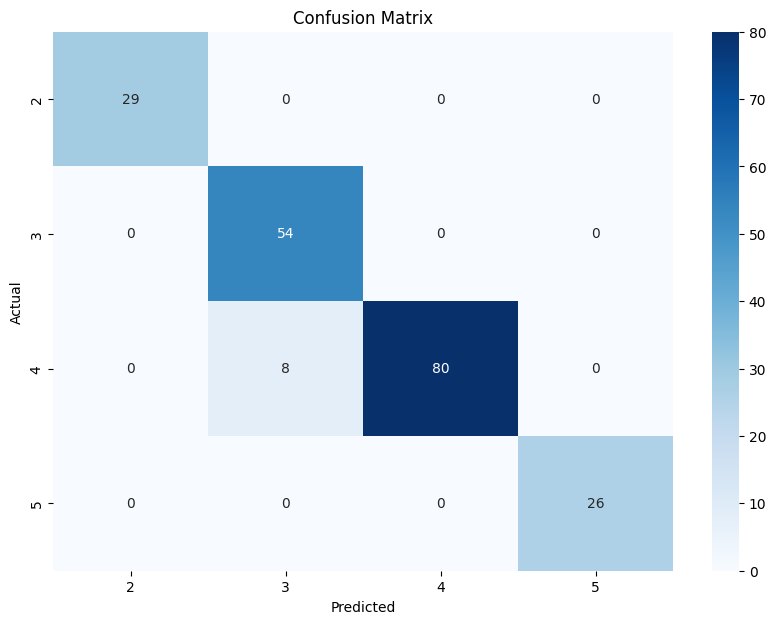

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi pada data testing
y_test_pred_encoded = ann.predict(X_test)
y_test_pred = np.argmax(y_test_pred_encoded, axis=1)

# Evaluasi metrik
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   Prediksi  Nilai Sebenarnya
0         2                 2
1         2                 2
2         2                 2
3         2                 2
4         5                 5
5         3                 3
6         3                 3
7         4                 4
8         4                 4
9         4                 4


C:\Users\reinh\AppData\Local\Temp\ipykernel_30232\4255602725.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediksi', data=predictions_df, palette='viridis')


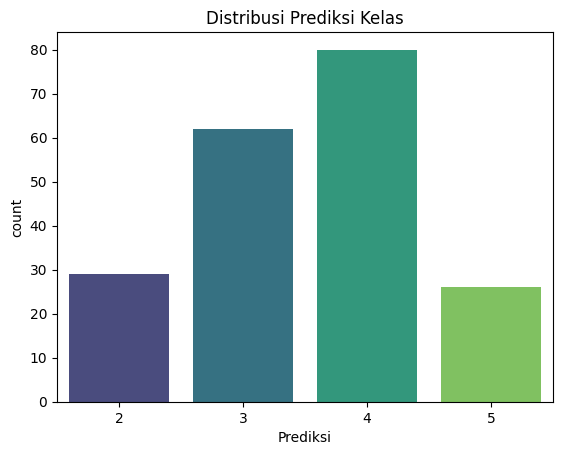

In [115]:
import pandas as pd

# Membuat DataFrame dari hasil prediksi dan nilai sebenarnya
predictions_df = pd.DataFrame({
    'Prediksi': y_test_pred,
    'Nilai Sebenarnya': y_test
})

# Menampilkan beberapa baris pertama
print(predictions_df.head(10))

# Plotting untuk visualisasi (opsional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Prediksi', data=predictions_df, palette='viridis')
plt.title('Distribusi Prediksi Kelas')
plt.show()


In [116]:
y_test_pred_encoded = ann.predict(X_test)
y_test_pred = np.argmax(y_test_pred_encoded, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [117]:
y_test_pred

array([2, 2, 2, 2, 5, 3, 3, 4, 4, 4, 4, 4, 2, 5, 4, 4, 2, 2, 5, 2, 3, 2,
       3, 3, 3, 4, 4, 5, 5, 2, 4, 3, 4, 3, 4, 4, 2, 2, 3, 4, 3, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 3, 2, 4, 3, 4, 3, 4, 4, 4, 2, 2, 5, 4, 2, 3, 3,
       4, 3, 3, 4, 5, 5, 4, 2, 3, 3, 4, 4, 3, 4, 2, 4, 4, 3, 4, 3, 3, 3,
       4, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 4, 3, 4, 2, 5, 3, 3, 4, 4, 4, 4,
       4, 4, 2, 3, 3, 5, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4, 2, 4, 3, 5,
       4, 2, 3, 2, 4, 3, 4, 3, 4, 3, 5, 3, 3, 4, 3, 4, 3, 3, 4, 5, 3, 3,
       3, 5, 3, 5, 3, 4, 2, 4, 3, 3, 4, 4, 2, 5, 3, 2, 3, 5, 4, 4, 4, 4,
       4, 5, 4, 5, 2, 4, 4, 3, 2, 4, 4, 5, 4, 4, 3, 5, 4, 5, 4, 4, 5],
      dtype=int64)